In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import describe, normaltest
import matplotlib.pyplot as plt
import statistics

data1 = "1_paid_marketing.csv"
data2 = "2_hcp_data.csv"
data3 = "3_shifts_data.csv"
campaigns = pd.read_csv(data1)
hcp = pd.read_csv(data2)
shifts = pd.read_csv(data3)

In [2]:
hcp.dropna(subset = ['FIRST_SHIFT_TIME'], inplace=True)

In [3]:
hcp.FIRST_SHIFT_TIME = pd.to_datetime(hcp['FIRST_SHIFT_TIME'], errors='coerce')
hcp.LIFETIME_SHIFTS = pd.to_numeric(hcp['LIFETIME_SHIFTS'], errors='coerce')

In [4]:
latest_shift = hcp['FIRST_SHIFT_TIME'].max()
print(latest_shift)
days_per_shift = (latest_shift - hcp['FIRST_SHIFT_TIME']) / hcp['LIFETIME_SHIFTS']
float_days = []

for i in days_per_shift:
    float_days.append(round(i.total_seconds()/(60*60*24), 1))
    
hcp['days between shifts'] = float_days
hcp

2023-01-16 00:00:00


,HCP_ID,MSA,QUALIFICATION,CREATED_AT,LICENSE_REVIEWED,ONBOARD_AT,FIRST_CLAIM_TIME,FIRST_SHIFT_TIME,LIFETIME_SHIFTS,REFERRER,CAMPAIGN_KEY,days between shifts
0,633be91bfb9a096b9e4d3a82,"Wichita, KS",CNA,10/5/22,10/13/22,10/29/22,11/1/22,2022-11-21,2,NaN,17631861264,28.0
7,63309d8c9603d780838a78aa,"Atlanta-Sandy Springs-Alpharetta, GA",LVN,9/25/22,9/26/22,9/26/22,10/10/22,2022-10-16,23,NaN,17631861264,4.0
16,61e75e34dfb86b018a0d7cf7,"Minneapolis-St. Paul-Bloomington, MN-WI",CNA,1/19/22,5/24/22,5/24/22,6/1/22,2022-06-03,49,NaN,15595984274,4.6
23,6335c00b9603d78083e59772,"Chicago-Naperville-Elgin, IL-IN-WI",CNA,9/29/22,10/8/22,10/8/22,10/8/22,2022-10-24,13,NaN,17631861264,6.5
31,62b2499e52b98c01b901cd9d,"Chicago-Naperville-Elgin, IL-IN-WI",RN,6/21/22,6/22/22,6/22/22,6/29/22,2022-06-29,2,62a48ae5691b0409a3c93073,16802693037,100.5
36,625122a4a2d1ff01b003e0ec,"Youngstown-Warren-Boardman, OH-PA",CNA,4/9/22,8/20/22,8/21/22,8/22/22,2022-08-24,33,626d668f26a30901c5af9741,17631861264,4.4
37,632376bb9603d78083c59bf1,"Portland-Vancouver-Hillsboro, OR-WA",CNA,9/15/22,9/15/22,9/30/22,10/4/22,2022-10-04,22,62edf0aa44b0f101b46c89ab,17944426072,4.7
44,631b401f9603d78083193e28,"Los Angeles-Long Beach-Anaheim, CA",CNA,9/13/22,9/13/22,9/23/22,9/27/22,2022-10-01,6,61c60d19b8bfc80180d64eac,17631861264,17.8
45,63773e1d7ccb0c3b06646f20,"Providence-Warwick, RI-MA",CNA,11/18/22,11/18/22,11/18/22,11/22/22,2022-11-24,20,63322f689603d780835ab925,18576997082,2.6
51,628e47fca9b31401c35619d2,"Dallas-Fort Worth-Arlington, TX",RN,5/25/22,5/25/22,5/27/22,8/13/22,2022-08-13,8,NaN,18530777721,19.5


In [5]:
print(round(hcp['days between shifts'].mean(), 1))

19.5


In [6]:
print(hcp['days between shifts'].median())

9.2


In [7]:
print(round(statistics.stdev(hcp['days between shifts']), 1))

28.7


In [8]:
hcp[['MSA', 'state']] = hcp['MSA'].str.split(', ', 1, expand=True)
hcp

,HCP_ID,MSA,QUALIFICATION,CREATED_AT,LICENSE_REVIEWED,ONBOARD_AT,FIRST_CLAIM_TIME,FIRST_SHIFT_TIME,LIFETIME_SHIFTS,REFERRER,CAMPAIGN_KEY,days between shifts,state
0,633be91bfb9a096b9e4d3a82,Wichita,CNA,10/5/22,10/13/22,10/29/22,11/1/22,2022-11-21,2,NaN,17631861264,28.0,KS
7,63309d8c9603d780838a78aa,Atlanta-Sandy Springs-Alpharetta,LVN,9/25/22,9/26/22,9/26/22,10/10/22,2022-10-16,23,NaN,17631861264,4.0,GA
16,61e75e34dfb86b018a0d7cf7,Minneapolis-St. Paul-Bloomington,CNA,1/19/22,5/24/22,5/24/22,6/1/22,2022-06-03,49,NaN,15595984274,4.6,MN-WI
23,6335c00b9603d78083e59772,Chicago-Naperville-Elgin,CNA,9/29/22,10/8/22,10/8/22,10/8/22,2022-10-24,13,NaN,17631861264,6.5,IL-IN-WI
31,62b2499e52b98c01b901cd9d,Chicago-Naperville-Elgin,RN,6/21/22,6/22/22,6/22/22,6/29/22,2022-06-29,2,62a48ae5691b0409a3c93073,16802693037,100.5,IL-IN-WI
36,625122a4a2d1ff01b003e0ec,Youngstown-Warren-Boardman,CNA,4/9/22,8/20/22,8/21/22,8/22/22,2022-08-24,33,626d668f26a30901c5af9741,17631861264,4.4,OH-PA
37,632376bb9603d78083c59bf1,Portland-Vancouver-Hillsboro,CNA,9/15/22,9/15/22,9/30/22,10/4/22,2022-10-04,22,62edf0aa44b0f101b46c89ab,17944426072,4.7,OR-WA
44,631b401f9603d78083193e28,Los Angeles-Long Beach-Anaheim,CNA,9/13/22,9/13/22,9/23/22,9/27/22,2022-10-01,6,61c60d19b8bfc80180d64eac,17631861264,17.8,CA
45,63773e1d7ccb0c3b06646f20,Providence-Warwick,CNA,11/18/22,11/18/22,11/18/22,11/22/22,2022-11-24,20,63322f689603d780835ab925,18576997082,2.6,RI-MA
51,628e47fca9b31401c35619d2,Dallas-Fort Worth-Arlington,RN,5/25/22,5/25/22,5/27/22,8/13/22,2022-08-13,8,NaN,18530777721,19.5,TX


In [9]:
cal_hcp = hcp.loc[hcp['state']=='CA'].reset_index(drop=True)
ten_hcp = hcp.loc[hcp['state']=='TN'].reset_index(drop=True)

la_hcp = cal_hcp.loc[cal_hcp['MSA']=='Los Angeles-Long Beach-Anaheim'].reset_index(drop=True)
nash_hcp = ten_hcp.loc[ten_hcp['MSA']=='Nashville-Davidson--Murfreesboro--Franklin'].reset_index(drop=True)

In [10]:
print(round(la_hcp['days between shifts'].mean(), 1))
print(round(nash_hcp['days between shifts'].mean(), 1))

18.3
20.5


In [11]:
print(la_hcp['days between shifts'].median())
print(nash_hcp['days between shifts'].median())

9.5
12.0


In [12]:
print(round(statistics.stdev(la_hcp['days between shifts']), 1))
print(round(statistics.stdev(nash_hcp['days between shifts']), 1))

26.1
22.7


In [13]:
la_hcp.dropna(subset = ['REFERRER'], inplace=True)
nash_hcp.dropna(subset = ['REFERRER'], inplace=True)

ref_la = la_hcp.reset_index(drop=True)
ref_nash = nash_hcp.reset_index(drop=True)

In [14]:
print(round(ref_la['days between shifts'].mean(), 1))
print(round(ref_nash['days between shifts'].mean(), 1))

17.2
17.8


In [15]:
print(ref_la['days between shifts'].median())
print(ref_nash['days between shifts'].median())

9.4
10.3


In [16]:
print(round(statistics.stdev(ref_la['days between shifts']), 1))
print(round(statistics.stdev(ref_nash['days between shifts']), 1))

23.1
17.3


# Histogram of Referred Accounts: Nashville, LA, Overall

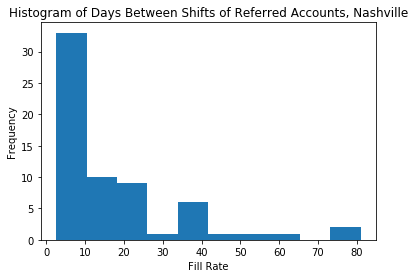

In [17]:
plt.hist(ref_nash['days between shifts'], bins=10) 
plt.title("Histogram of Days Between Shifts of Referred Accounts, Nashville")
plt.xlabel("Fill Rate")
plt.ylabel("Frequency")
plt.show()

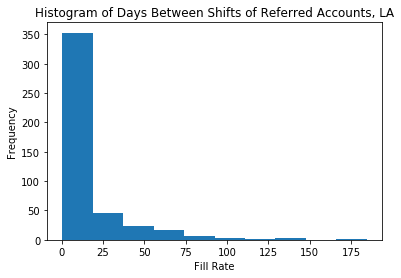

In [18]:
plt.hist(ref_la['days between shifts'], bins=10) 
plt.title("Histogram of Days Between Shifts of Referred Accounts, LA")
plt.xlabel("Fill Rate")
plt.ylabel("Frequency")
plt.show()

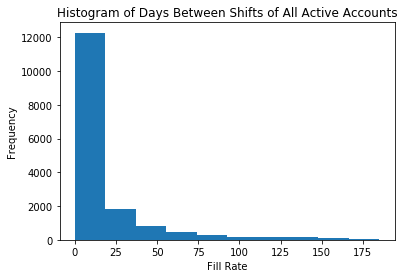

In [19]:
plt.hist(hcp['days between shifts'], bins=10) 
plt.title("Histogram of Days Between Shifts of All Active Accounts")
plt.xlabel("Fill Rate")
plt.ylabel("Frequency")
plt.show()

# Removing Accounts Over 50 Days Between Shifts

In [20]:
regulars = hcp.loc[hcp['days between shifts']<50].reset_index(drop=True)

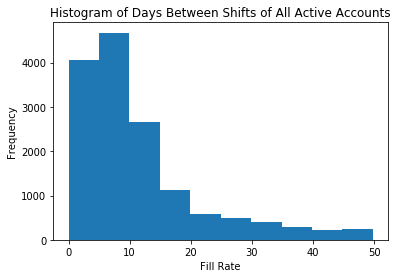

In [21]:
plt.hist(regulars['days between shifts'], bins=10) 
plt.title("Histogram of Days Between Shifts of All Active Accounts")
plt.xlabel("Fill Rate")
plt.ylabel("Frequency")
plt.show()

In [22]:
inactives = hcp.loc[hcp['days between shifts']>=50].reset_index(drop=True)

In [23]:
regulars.dropna(subset = ['REFERRER'], inplace=True)
inactives.dropna(subset = ['REFERRER'], inplace=True)

In [24]:
regulars

,HCP_ID,MSA,QUALIFICATION,CREATED_AT,LICENSE_REVIEWED,ONBOARD_AT,FIRST_CLAIM_TIME,FIRST_SHIFT_TIME,LIFETIME_SHIFTS,REFERRER,CAMPAIGN_KEY,days between shifts,state
4,625122a4a2d1ff01b003e0ec,Youngstown-Warren-Boardman,CNA,4/9/22,8/20/22,8/21/22,8/22/22,2022-08-24,33,626d668f26a30901c5af9741,17631861264,4.4,OH-PA
5,632376bb9603d78083c59bf1,Portland-Vancouver-Hillsboro,CNA,9/15/22,9/15/22,9/30/22,10/4/22,2022-10-04,22,62edf0aa44b0f101b46c89ab,17944426072,4.7,OR-WA
6,631b401f9603d78083193e28,Los Angeles-Long Beach-Anaheim,CNA,9/13/22,9/13/22,9/23/22,9/27/22,2022-10-01,6,61c60d19b8bfc80180d64eac,17631861264,17.8,CA
7,63773e1d7ccb0c3b06646f20,Providence-Warwick,CNA,11/18/22,11/18/22,11/18/22,11/22/22,2022-11-24,20,63322f689603d780835ab925,18576997082,2.6,RI-MA
11,6359e54d7ccb0c3b06b852fe,Stockton,CNA,10/27/22,11/3/22,12/19/22,12/21/22,2022-12-25,2,627add1600b6fa01bf515154,18672087778,11.0,CA
12,636877ce7ccb0c3b06481c58,St. Louis,LVN,11/7/22,11/7/22,11/7/22,11/7/22,2022-11-14,21,636077ca7ccb0c3b06d557fb,18530777721,3.0,MO-IL
14,634b42e8fb9a096b9ed2450d,New York-Newark-Jersey City,CNA,10/15/22,10/15/22,10/21/22,10/28/22,2022-10-30,17,62df3d91fdf4bc01b592950c,18530777721,4.6,NY-NJ-PA
15,631c84b39603d780830b3af1,Worcester,LVN,9/10/22,9/10/22,9/26/22,9/27/22,2022-10-04,25,6306ab0583641501b86269a0,18201219115,4.2,MA-CT
16,633f69eafb9a096b9e7d50bb,Philadelphia-Camden-Wilmington,CNA,10/6/22,10/13/22,12/19/22,12/20/22,2023-01-07,4,615cbcc3b1ab02016bc44c93,SO_Trenton_CNA,2.2,PA-NJ-DE-MD
18,632b62329603d78083d89b57,Salem,LVN,9/21/22,9/21/22,9/30/22,12/10/22,2022-12-11,21,631ac4039603d78083aaf91d,17673624632,1.7,OR


In [26]:
cal_reg = regulars.loc[regulars['state']=='CA'].reset_index(drop=True)
ten_reg = regulars.loc[regulars['state']=='TN'].reset_index(drop=True)

la_reg = cal_reg.loc[cal_reg['MSA']=='Los Angeles-Long Beach-Anaheim'].reset_index(drop=True)
nash_reg = ten_reg.loc[ten_reg['MSA']=='Nashville-Davidson--Murfreesboro--Franklin'].reset_index(drop=True)

In [27]:
cal_inac = inactives.loc[inactives['state']=='CA'].reset_index(drop=True)
ten_inac = inactives.loc[inactives['state']=='TN'].reset_index(drop=True)

la_inac = cal_inac.loc[cal_inac['MSA']=='Los Angeles-Long Beach-Anaheim'].reset_index(drop=True)
nash_inac = ten_inac.loc[ten_inac['MSA']=='Nashville-Davidson--Murfreesboro--Franklin'].reset_index(drop=True)

In [30]:
nash_inac

,HCP_ID,MSA,QUALIFICATION,CREATED_AT,LICENSE_REVIEWED,ONBOARD_AT,FIRST_CLAIM_TIME,FIRST_SHIFT_TIME,LIFETIME_SHIFTS,REFERRER,CAMPAIGN_KEY,days between shifts,state
0,62662914b3bdc301afff0ca6,Nashville-Davidson--Murfreesboro--Franklin,CNA,4/25/22,4/25/22,9/2/22,9/3/22,2022-10-06,2,61ed3a6c85f245018b14659a,na,51.0,TN
1,62aed77b87fa8001b874b359,Nashville-Davidson--Murfreesboro--Franklin,CNA,6/19/22,6/19/22,6/19/22,8/12/22,2022-08-16,2,62685dd8f9e3ce01b8e50347,15595984274,76.5,TN
2,6281cb0fad086401c0dcf1c2,Nashville-Davidson--Murfreesboro--Franklin,CNA,5/16/22,5/16/22,5/26/22,7/20/22,2022-08-07,2,618177dcb5de410186982e7e,na,81.0,TN
3,61e313272223a3018afaf627,Nashville-Davidson--Murfreesboro--Franklin,CNA,1/15/22,1/16/22,4/30/22,5/4/22,2022-09-10,2,6276e4759230dc01c12701f1,13743509691,64.0,TN


In [31]:
regulars['FIRST_SHIFT_TIME'].min()

Timestamp('2022-01-12 00:00:00')

In [32]:
regulars['CREATED_AT'].min()

'1/10/22'